In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("movies.csv",encoding ='latin1')

In [3]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [4]:
df.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


<function matplotlib.pyplot.show>

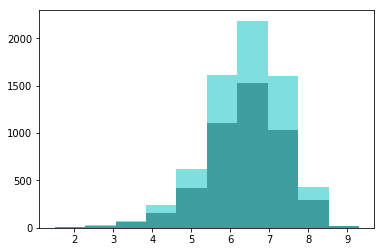

In [13]:
#histogram of scores including vs excluding movies without budget provided
df_budget = df[df.budget !=0]
plt.hist(df_budget['score'], alpha =.5, color = 'black')
plt.hist(df['score'], alpha = .5, color = 'c')
plt.show

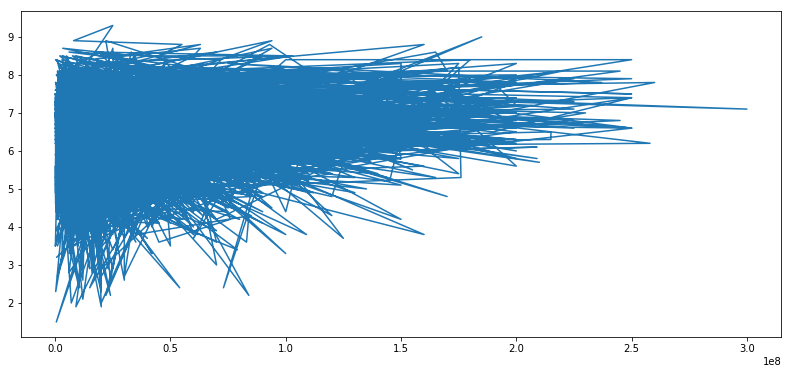

In [43]:
#budget/score plot
plt.figure(figsize=(30,6))
plt.subplot(1, 2, 1)
plt.plot(df_budget['budget'], df_budget['score'])

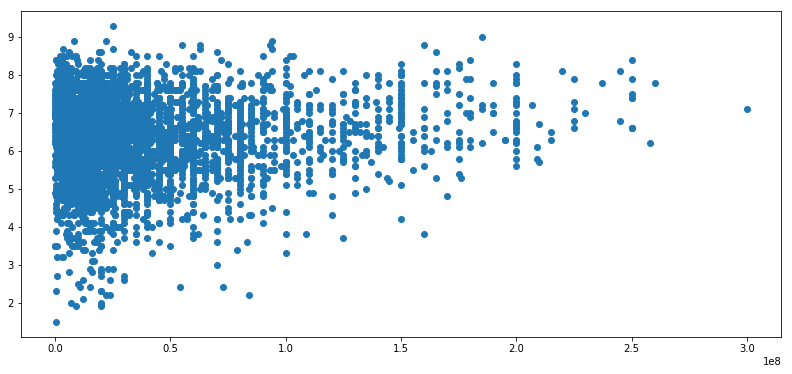

In [53]:
#budget/score scatterplot
plt.figure(figsize=(30,6))
plt.subplot(1, 2, 1)
plt.scatter(df_budget["budget"], df_budget["score"])

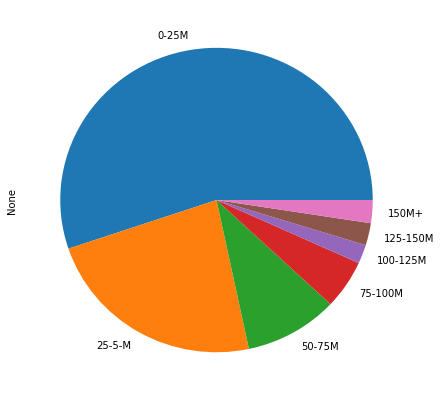

In [117]:
#budget pie chart
df['bins'] = pd.cut(df['budget'],bins=[1,25000000,50000000,75000000,100000000,125000000,150000000,300000000], labels=["0-25M","25-5-M","50-75M","75-100M","100-125M","125-150M","150M+"])
pie_budget = df.groupby('bins').size()
pie_budget.plot.pie(figsize=(7,7))
plt.show()

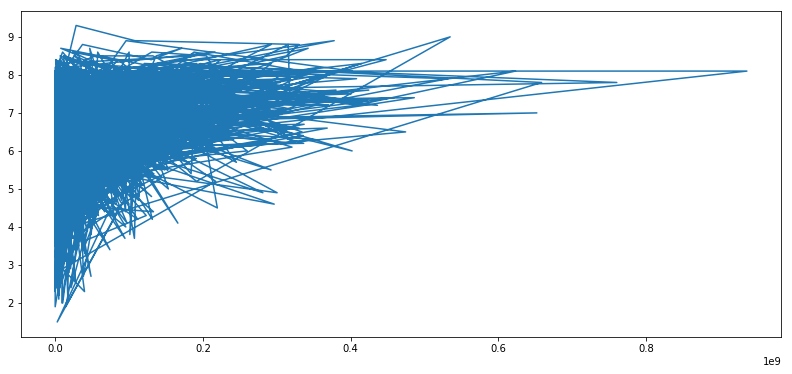

In [52]:
#gross/score plot
plt.figure(figsize=(30,6))
plt.subplot(1, 2, 1)
plt.plot(df_budget["gross"], df_budget["score"])

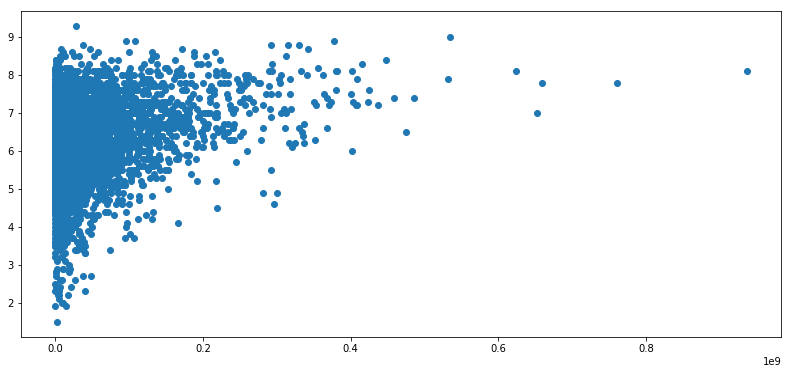

In [51]:
#gross/score scatterplot
plt.figure(figsize=(30,6))
plt.subplot(1, 2, 1)
plt.scatter(df_budget["gross"], df_budget["score"])

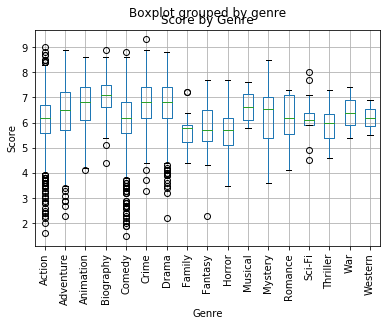

In [16]:
#genre/score boxplot
df.boxplot(column = 'score', by = 'genre')
plt.title("Score by Genre")
plt.ylabel('Score')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.show()

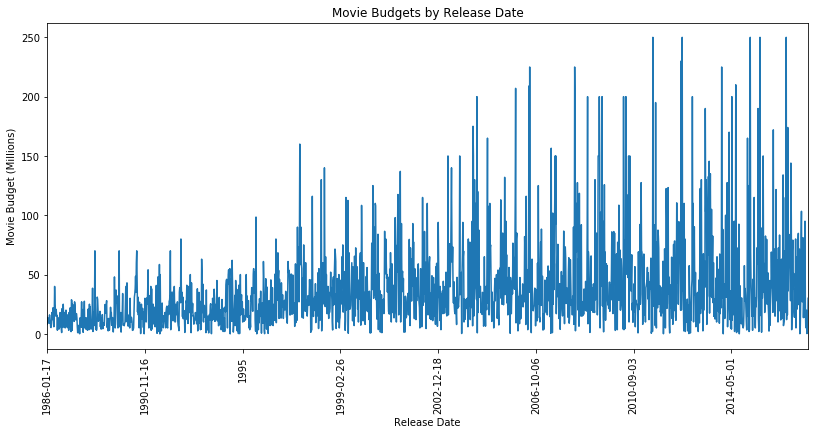

In [130]:
#release date/budget
plt.figure(figsize=(30,6))
plt.subplot(1, 2, 1)
df_budget.groupby('released').budget.mean().plot(kind = "line")
plt.xlabel('Release Date')
plt.ylabel('Movie Budget (Millions)')
plt.title('Movie Budgets by Release Date')
tick_val = [0, 50000000, 100000000, 150000000, 200000000, 250000000]
tick_lab = ['0','50', '100', '150', '200', '250'] 
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)
plt.show()

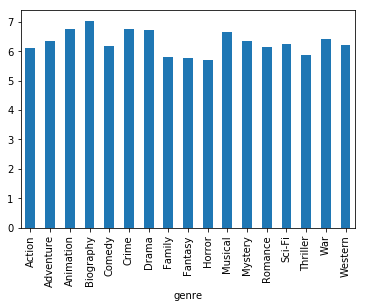

In [18]:
#genre/score
df.groupby('genre').score.mean().plot(kind = "bar")
plt.show()